# 0. 필요한 라이브러리 임포트







In [ ]:
!virtualenv -p python3 virtualenvironment
!source virtualenvironment/bin/activate
!pip install ta
!pip install -U finance-datareader
!pip install --upgrade finance-datareader
!pip install pykrx
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!pip3 install matplotlib
!pip install --upgrade matplotlib


/bin/bash: virtualenv: command not found
/bin/bash: virtualenvironment/bin/activate: No such file or directory
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29088 sha256=7afb99d6d9520c95eb6ccd9e4059346700ff3664ea5dacd67f90579dd75de8dd
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

# **1. 데이터 수집**

1.1 삼성전자 주식데이터 불러오기

In [ ]:
import FinanceDataReader as fdr

#시작일, 종료일 설정
start_date = '2000-01-01'
end_date = '2022-12-31'

samsung_stock = fdr.DataReader('005930', start_date, end_date)
#'삼성전자 데이터 확인
samsung_stock

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-01-04,6000,6110,5660,6110,1483967,0.148496
2000-01-05,5800,6060,5520,5580,1493604,-0.086743
2000-01-06,5750,5780,5580,5620,1087810,0.007168
2000-01-07,5560,5670,5360,5540,806195,-0.014235
2000-01-10,5600,5770,5580,5770,937615,0.041516
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


1.2 보조지표 추가

In [ ]:
#이동평균선 추가 작업

ma = [5,20,60,120]
for days in ma:
    samsung_stock['ma_'+str(days)] = samsung_stock['Close'].rolling(window = days).mean()
    samsung_stock = samsung_stock.dropna()

#'005930(삼성전자) 데이터 확인
samsung_stock

<ipython-input-4-ee26e551d06a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung_stock['ma_'+str(days)] = samsung_stock['Close'].rolling(window = days).mean()


,Open,High,Low,Close,Volume,Change,ma_5,ma_20,ma_60,ma_120
Date,,,,,,,,,,
2000-10-31,2750,2850,2630,2850,1263847,0.036364,2908.0,3220.5,4620.833333,5710.166667
2000-11-01,3000,3270,2960,3260,1883300,0.143860,2918.0,3189.0,4574.000000,5685.833333
2000-11-02,3200,3429,3170,3320,2463636,0.018405,3004.0,3158.0,4528.833333,5658.833333
2000-11-03,3420,3470,3370,3440,1608435,0.036145,3124.0,3135.0,4487.500000,5634.416667
2000-11-06,3460,3670,3380,3510,1437330,0.020349,3276.0,3126.0,4453.000000,5610.750000
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920,58660.0,59785.0,59000.000000,58887.500000
2022-12-26,58000,58100,57700,57900,6756411,-0.003442,58340.0,59675.0,59088.333333,58894.166667
2022-12-27,58000,58400,57900,58100,10667027,0.003454,58240.0,59550.0,59171.666667,58901.666667


In [ ]:
#모든 보조지표 추가
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna


#for code in krx10_stocks_code:
samsung_stock = add_all_ta_features(samsung_stock, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)


#삼성전자 데이터 확인
samsung_stock


/usr/local/lib/python3.10/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.10/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


,Open,High,Low,Close,Volume,Change,ma_5,ma_20,ma_60,ma_120,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2000-10-31,2750,2850,2630,2850,1263847,0.036364,2908.0,3220.5,4620.833333,5710.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2850.000000,-89.391754,0.000000,0.000000
2000-11-01,3000,3270,2960,3260,1883300,0.143860,2918.0,3189.0,4574.000000,5685.833333,...,1.135498,0.227100,0.908399,3.772912,0.754582,3.018330,3032.222222,14.385965,13.440820,14.385965
2000-11-02,3200,3429,3170,3320,2463636,0.018405,3004.0,3158.0,4528.833333,5658.833333,...,2.154011,0.612482,1.541529,9.594422,2.522550,7.071872,3160.123457,1.840491,1.823759,16.491228
2000-11-03,3420,3470,3370,3440,1608435,0.036145,3124.0,3135.0,4487.500000,5634.416667,...,3.222820,1.134549,2.088270,9.232984,3.864637,5.368347,3284.513032,3.614458,3.550669,20.701754
2000-11-06,3460,3670,3380,3510,1437330,0.020349,3276.0,3126.0,4453.000000,5610.750000,...,4.176480,1.742936,2.433544,7.950386,4.681787,3.268599,3384.729462,2.034884,2.014457,23.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920,58660.0,59785.0,59000.000000,58887.500000,...,-0.725561,-0.334985,-0.390576,-8.614888,-8.758809,0.143921,66086.998871,-1.692047,-1.706526,1938.596491
2022-12-26,58000,58100,57700,57900,6756411,-0.003442,58340.0,59675.0,59088.333333,58894.166667,...,-0.844903,-0.436969,-0.407934,-10.816245,-9.170296,-1.645949,66052.921873,-0.344234,-0.344828,1931.578947
2022-12-27,58000,58400,57900,58100,10667027,0.003454,58240.0,59550.0,59171.666667,58901.666667,...,-0.902300,-0.530035,-0.372265,-9.382121,-9.212661,-0.169460,66019.819180,0.345423,0.344828,1938.596491


1.3 데이터 라벨링

In [ ]:
# 10일 전 가격보다 상승or하락했는지 분류

samsung_stock['daily_change'] = (samsung_stock['Close'].shift(-10) - samsung_stock['Close'])
samsung_stock.loc[samsung_stock['daily_change'] > 0, 'label'] = 'Rising'
samsung_stock.loc[samsung_stock['daily_change'] <= -0, 'label'] = 'Falling'


samsung_stock

,Open,High,Low,Close,Volume,Change,ma_5,ma_20,ma_60,ma_120,...,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,daily_change,label
Date,,,,,,,,,,,,,,,,,,,,,
2000-10-31,2750,2850,2630,2850,1263847,0.036364,2908.0,3220.5,4620.833333,5710.166667,...,0.000000,0.000000,0.000000,0.000000,2850.000000,-89.391754,0.000000,0.000000,440.0,Rising
2000-11-01,3000,3270,2960,3260,1883300,0.143860,2918.0,3189.0,4574.000000,5685.833333,...,0.908399,3.772912,0.754582,3.018330,3032.222222,14.385965,13.440820,14.385965,130.0,Rising
2000-11-02,3200,3429,3170,3320,2463636,0.018405,3004.0,3158.0,4528.833333,5658.833333,...,1.541529,9.594422,2.522550,7.071872,3160.123457,1.840491,1.823759,16.491228,-40.0,Falling
2000-11-03,3420,3470,3370,3440,1608435,0.036145,3124.0,3135.0,4487.500000,5634.416667,...,2.088270,9.232984,3.864637,5.368347,3284.513032,3.614458,3.550669,20.701754,-220.0,Falling
2000-11-06,3460,3670,3380,3510,1437330,0.020349,3276.0,3126.0,4453.000000,5610.750000,...,2.433544,7.950386,4.681787,3.268599,3384.729462,2.034884,2.014457,23.157895,-410.0,Falling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920,58660.0,59785.0,59000.000000,58887.500000,...,-0.390576,-8.614888,-8.758809,0.143921,66086.998871,-1.692047,-1.706526,1938.596491,NaN,NaN
2022-12-26,58000,58100,57700,57900,6756411,-0.003442,58340.0,59675.0,59088.333333,58894.166667,...,-0.407934,-10.816245,-9.170296,-1.645949,66052.921873,-0.344234,-0.344828,1931.578947,NaN,NaN
2022-12-27,58000,58400,57900,58100,10667027,0.003454,58240.0,59550.0,59171.666667,58901.666667,...,-0.372265,-9.382121,-9.212661,-0.169460,66019.819180,0.345423,0.344828,1938.596491,NaN,NaN


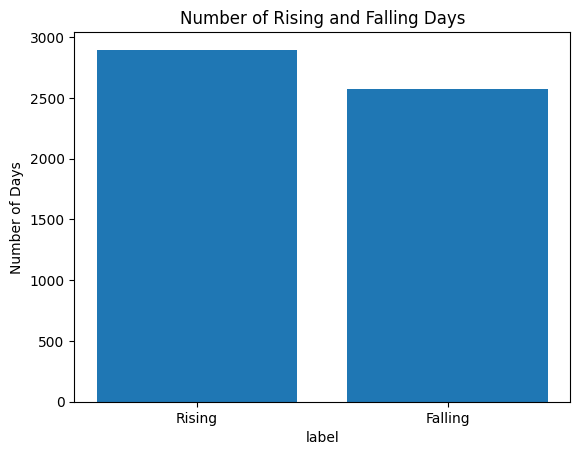

In [ ]:
# 삼성전자 상승, 하락, 유지일수 시각화

import matplotlib.pyplot as plt

rising_days = samsung_stock[samsung_stock['label'] == 'Rising'].shape[0]
falling_days = samsung_stock[samsung_stock['label'] == 'Falling'].shape[0]

plt.bar(['Rising', 'Falling'], [rising_days, falling_days])
plt.title('Number of Rising and Falling Days')
plt.xlabel('label')
plt.ylabel('Number of Days')
plt.show()

# **2. 데이터 전처리**

In [ ]:
#불필요한 컬럼 제거

samsung_stock = samsung_stock.drop(['Open','High','Low','Close','Volume','Change','daily_change'],axis = 1).dropna()

samsung_stock

,ma_5,ma_20,ma_60,ma_120,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,label
Date,,,,,,,,,,,,,,,,,,,,,
2000-10-31,2908.0,3220.5,4620.833333,5710.166667,1.263847e+06,1263847,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,2850.000000,-89.391754,0.000000,0.000000,Rising
2000-11-01,2918.0,3189.0,4574.000000,5685.833333,3.025644e+06,3147147,0.961393,7.721530e+08,6.172676e+06,6.172676e+06,...,0.227100,0.908399,3.772912,0.754582,3.018330,3032.222222,14.385965,13.440820,14.385965,Rising
2000-11-02,3004.0,3158.0,4528.833333,5658.833333,3.415640e+06,5610783,0.608764,6.829623e+08,1.939633e+06,4.056154e+06,...,0.612482,1.541529,9.594422,2.522550,7.071872,3160.123457,1.840491,1.823759,16.491228,Falling
2000-11-03,3124.0,3135.0,4487.500000,5634.416667,4.059014e+06,7219218,0.562251,6.129694e+08,7.491754e+05,2.953828e+06,...,1.134549,2.088270,9.232984,3.864637,5.368347,3284.513032,3.614458,3.550669,20.701754,Falling
2000-11-06,3276.0,3126.0,4453.000000,5610.750000,3.910325e+06,8656548,0.451719,5.397757e+08,2.118511e+06,2.744999e+06,...,1.742936,2.433544,7.950386,4.681787,3.268599,3384.729462,2.034884,2.014457,23.157895,Falling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09,59600.0,60975.0,58296.666667,58789.166667,-1.107691e+09,579334053,-0.006424,5.262607e+07,1.296342e+07,-1.083712e+06,...,0.649993,-0.563042,-4.183795,-5.306305,1.122510,66381.462879,2.027027,2.006756,2019.298246,Falling
2022-12-12,59440.0,60855.0,58355.000000,58795.833333,-1.113716e+09,570297581,0.013254,-1.116724e+09,-1.659940e+06,-8.265906e+05,...,0.514698,-0.541180,-6.179827,-5.481010,-0.698817,66352.819953,-1.490066,-1.501279,1987.719298,Falling
2022-12-13,59540.0,60720.0,58413.333333,58805.833333,-1.116729e+09,579338454,-0.041414,-6.988814e+08,1.493219e+06,-8.421709e+05,...,0.394025,-0.482692,-7.763108,-5.937429,-1.825679,66325.128715,0.336134,0.335571,1994.736842,Falling


In [ ]:
samsung_stock_data = samsung_stock.drop(['label'], axis = 1)

In [ ]:
samsung_stock_target = samsung_stock['label']
samsung_stock_target

Date
2000-10-31     Rising
2000-11-01     Rising
2000-11-02    Falling
2000-11-03    Falling
2000-11-06    Falling
               ...   
2022-12-09    Falling
2022-12-12    Falling
2022-12-13    Falling
2022-12-14    Falling
2022-12-15    Falling
Name: label, Length: 5467, dtype: object

In [ ]:
# train data와 test data로 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(samsung_stock_data, samsung_stock_target, random_state=0)
print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_train 크기: (4100, 90)
y_train 크기: (4100,)
X_test 크기: (1367, 90)
y_test 크기: (1367,)


<ipython-input-12-26fb23f2a8ae>:17: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


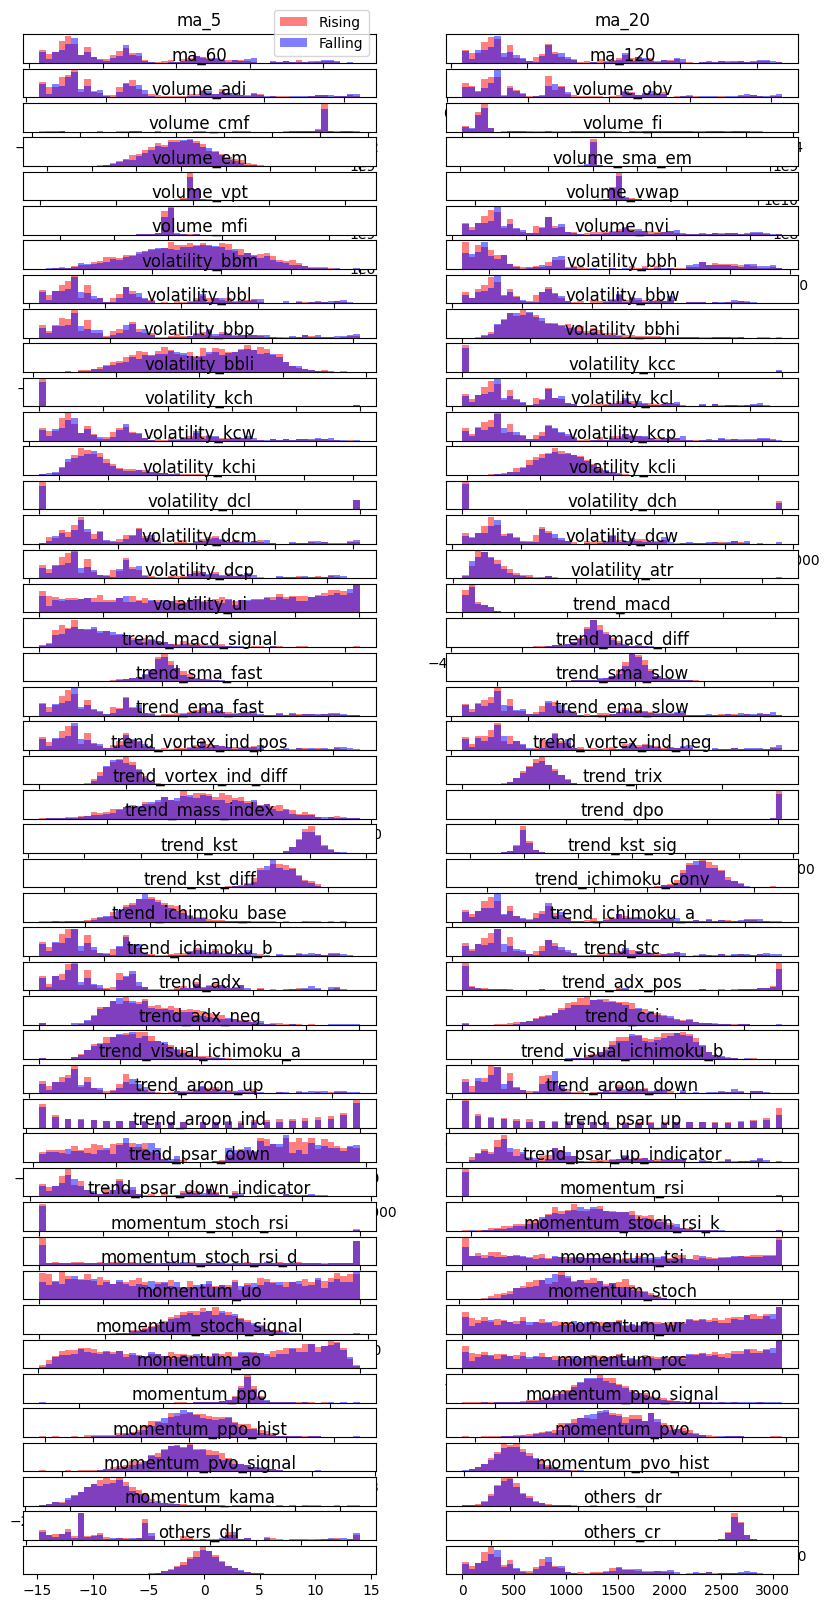

In [ ]:
# 히스토그램으로 시각화
import numpy as np
fig, axes = plt.subplots(45, 2, figsize = (10, 20))
Rising = samsung_stock[samsung_stock['label'] == 'Rising']
Falling = samsung_stock[samsung_stock['label'] == 'Falling']


ax = axes.ravel()

for i in range(90):
  _, bins = np.histogram(samsung_stock.iloc[:,i], bins = 50)
  ax[i].hist(Rising.iloc[:, i], bins = bins, color = 'r', alpha = 0.5)
  ax[i].hist(Falling.iloc[:, i], bins = bins, color = 'b', alpha = 0.5)
  ax[i].set_title(samsung_stock.columns[i])
  ax[i].set_yticks(())
ax[0].legend(["Rising", "Falling"], loc = "best")
fig.tight_layout()

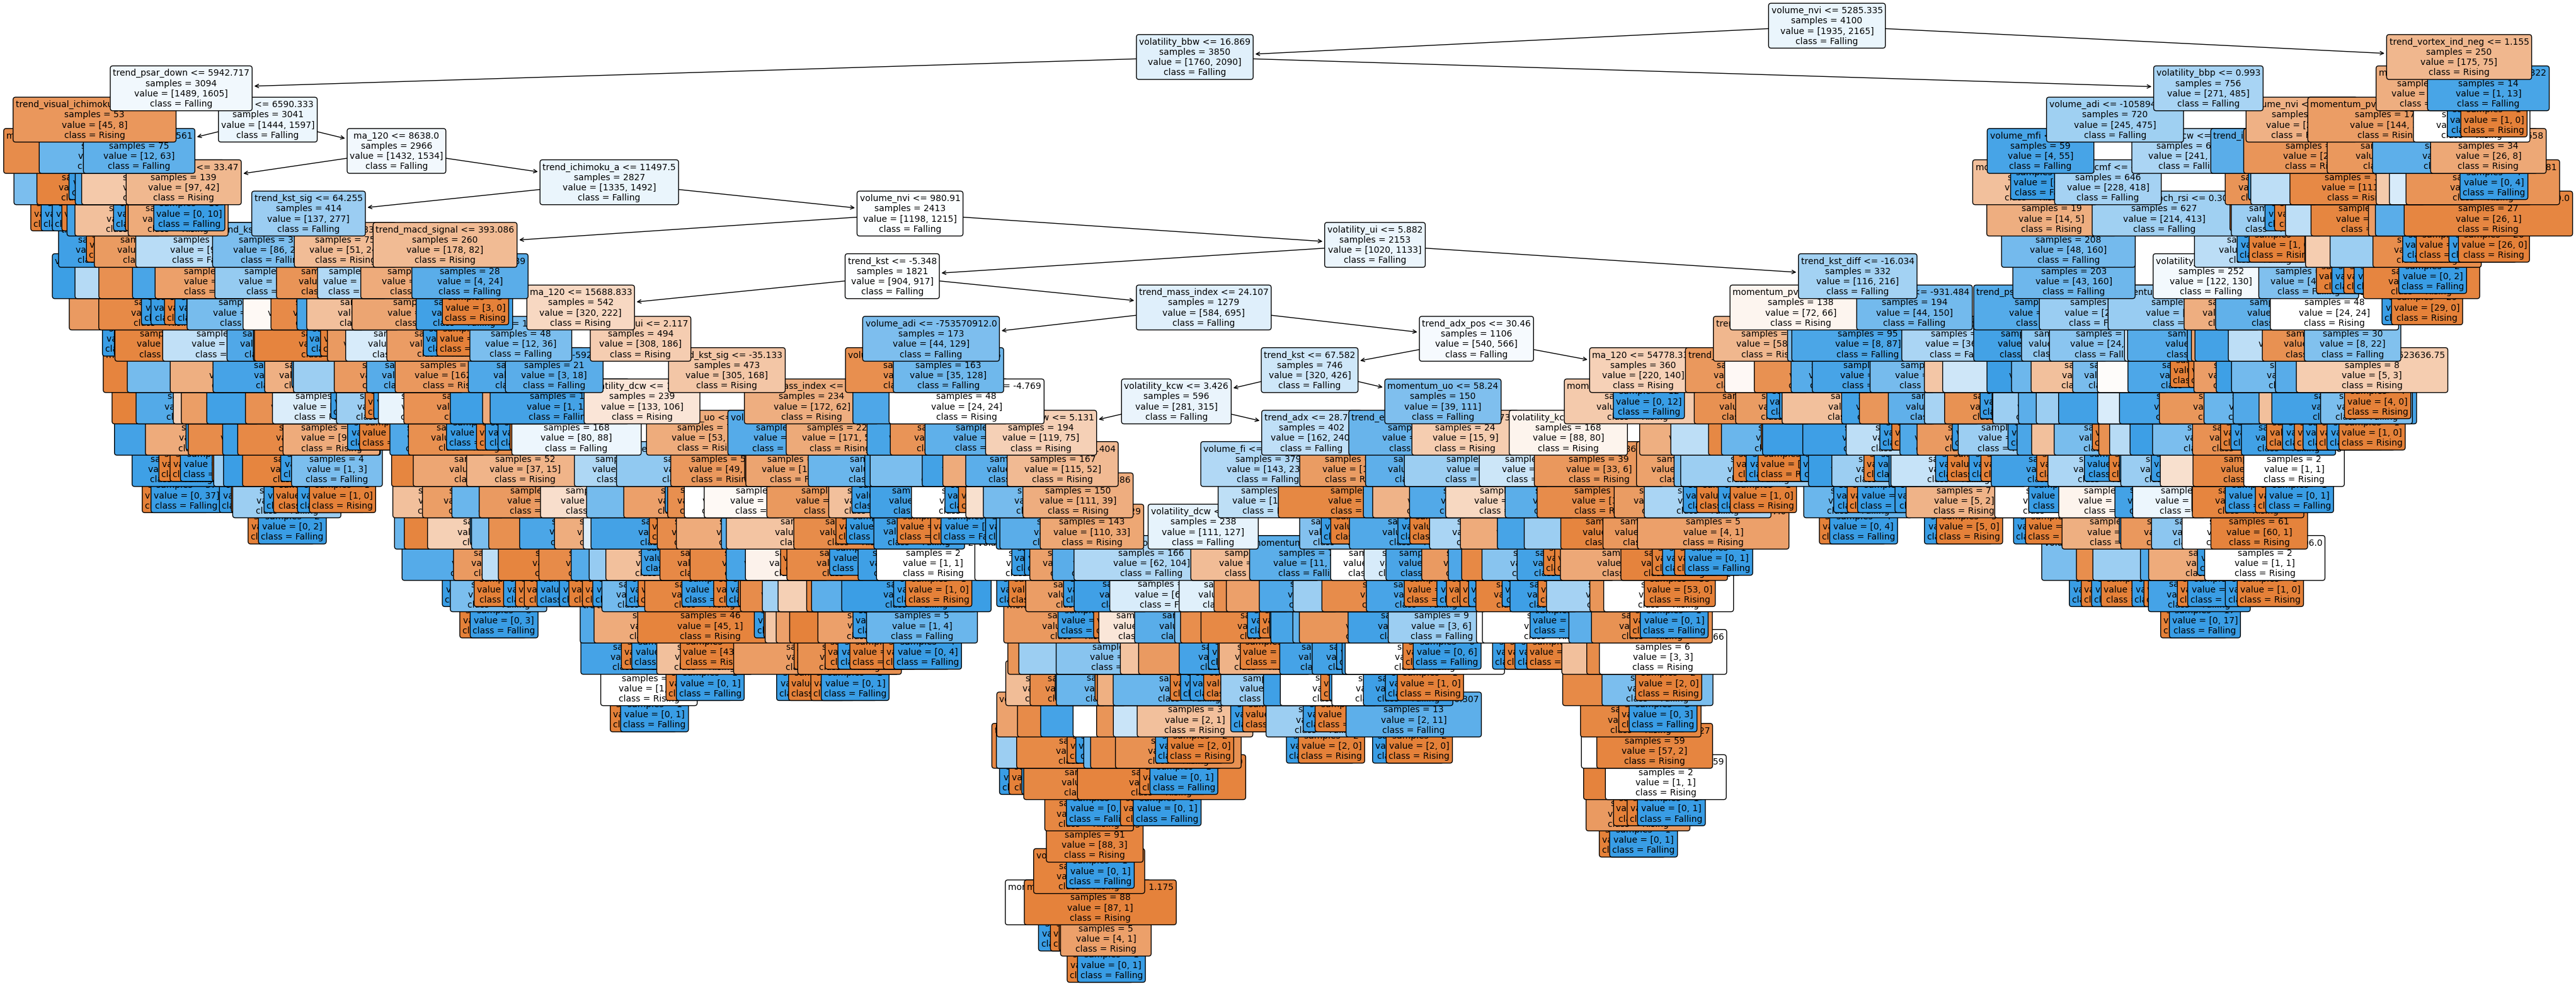

In [ ]:
#트리 시각화
#결정트리 시각화를 통해 사람의 시각에서 해석할 수 있는 요소가 있는지 확인
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

from sklearn.tree import plot_tree
plt.figure(figsize=(50,20))
plot_tree(tree, class_names=["Rising", "Falling"], feature_names = samsung_stock.columns, impurity = False, filled = True, rounded = True, fontsize = 10)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


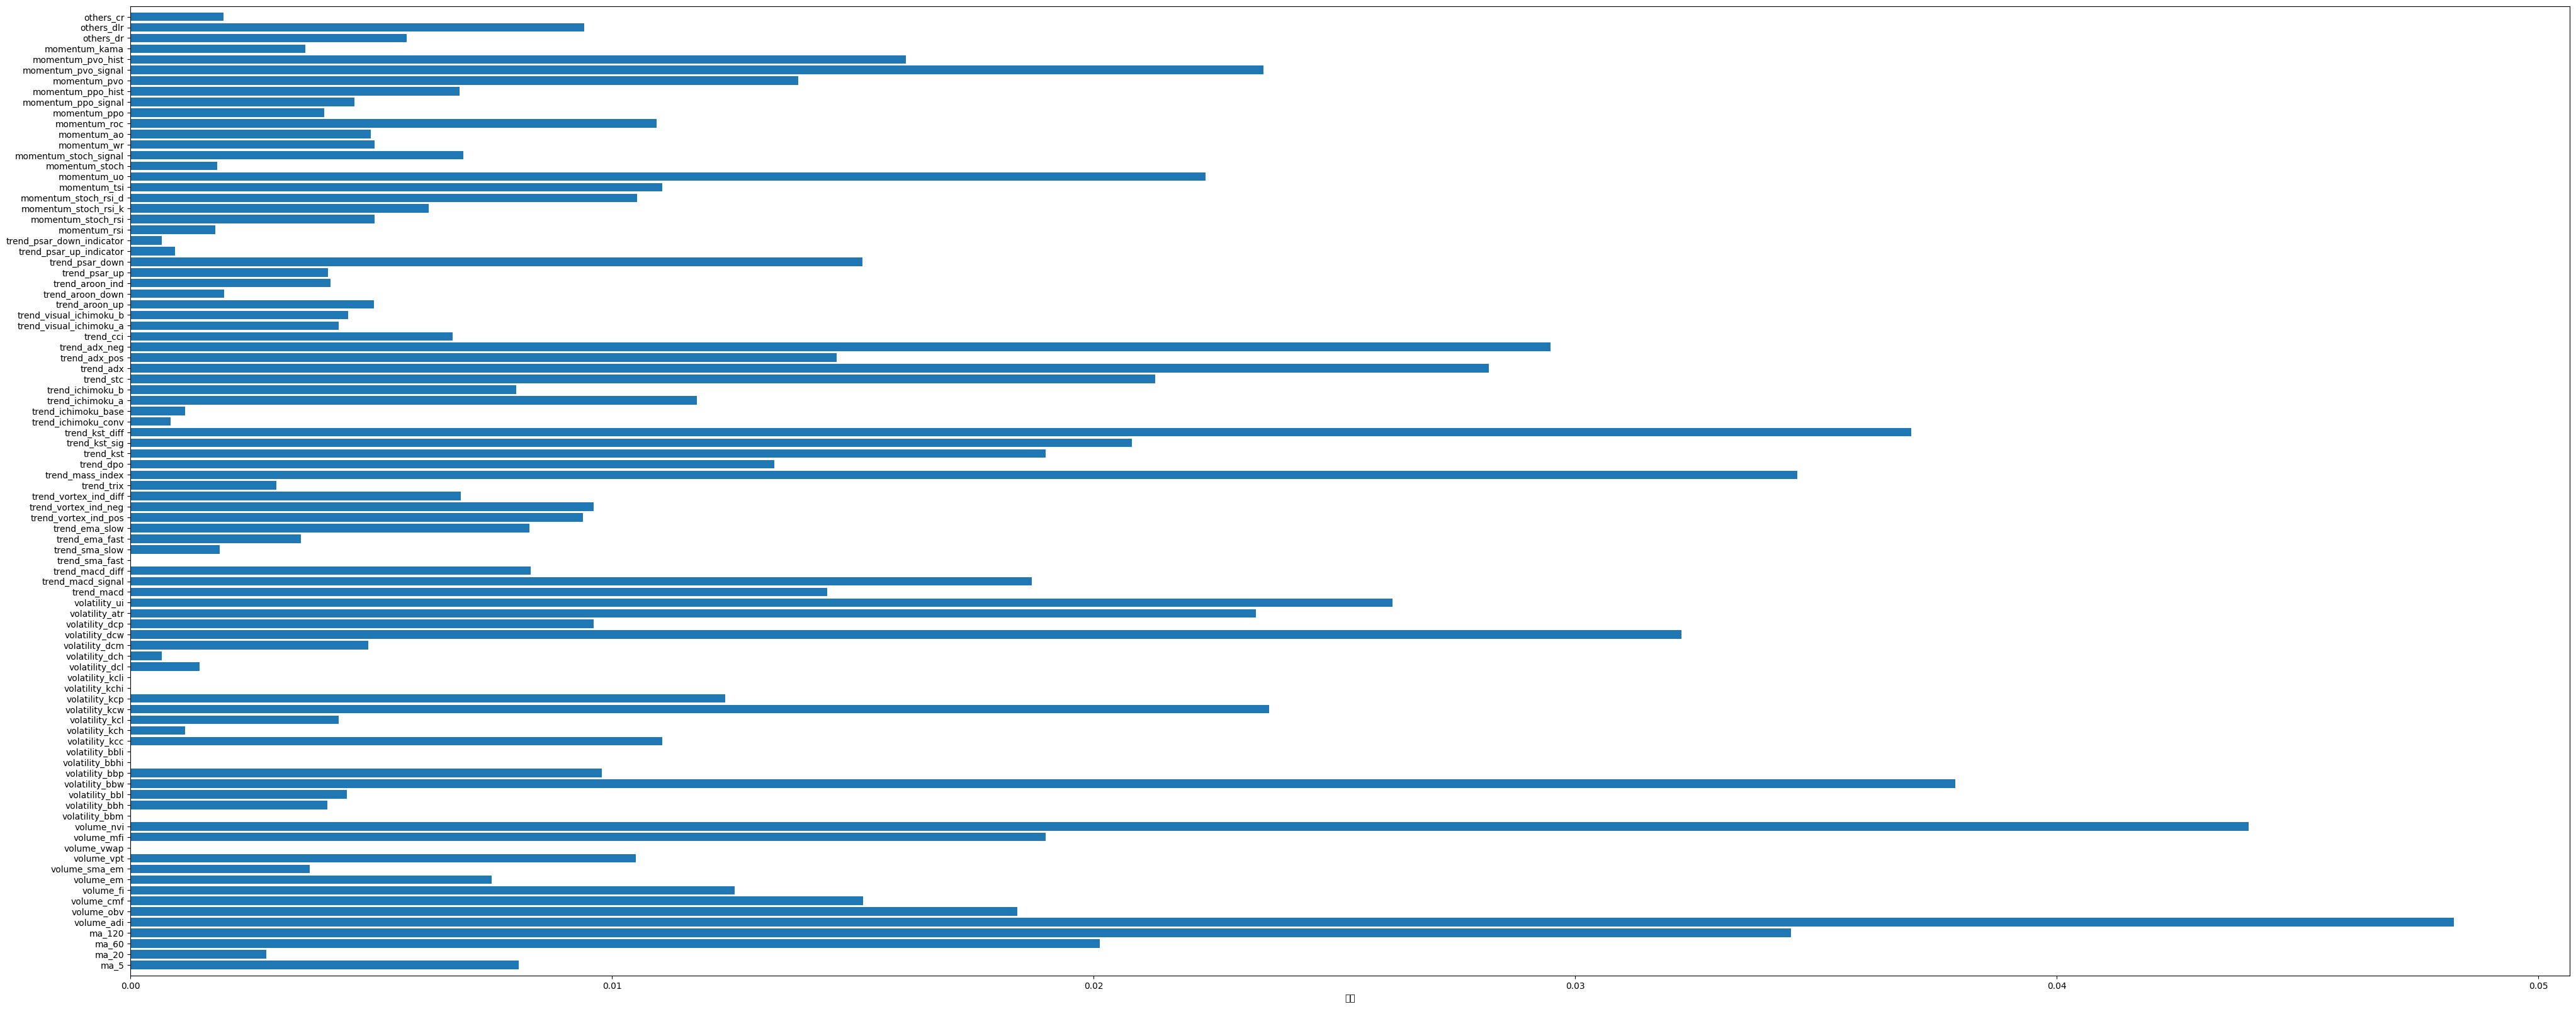

In [ ]:
# 특성 중요도 시각화
def plot_feature_importances_stock(model):
  n_features = samsung_stock_data.shape[1]
  plt.figure(figsize=(50,20))
  plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
  plt.yticks(np.arange(n_features),samsung_stock_data.columns)
  plt.xlabel("특성 중요도")
  plt.xlabel("특성")
  plt.ylim(-1, n_features)

plot_feature_importances_stock(tree)


결정트리를 통해 설명가능한 변수를 찾고자 했으나, 피쳐의 개수가 너무 많을 뿐 만 아니라 실행할 때마다 트리의 구성이 달라지는 문제가 생김. 또한 특성 중요도를 찾기 위해 이용한 feature_importances는 일관성이 없다는 문제가 있음. 이에 Shap_value를 이용해 주요변수를 추출해보고자 함(Shap_value의 개념 설명해주면 좋을듯!)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 29.6 MB/s eta 0:00:00
[LightGBM] [Info] Number of positive: 2165, number of negative: 1935
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20758
[LightGBM] [Info] Number of data points in the train set: 4100, number of used features: 90
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.528049 -> initscore=0.112313
[LightGBM] [Info] Start training from score 0.112313


Found `n_estimators` in params. Will use it instead of argument
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


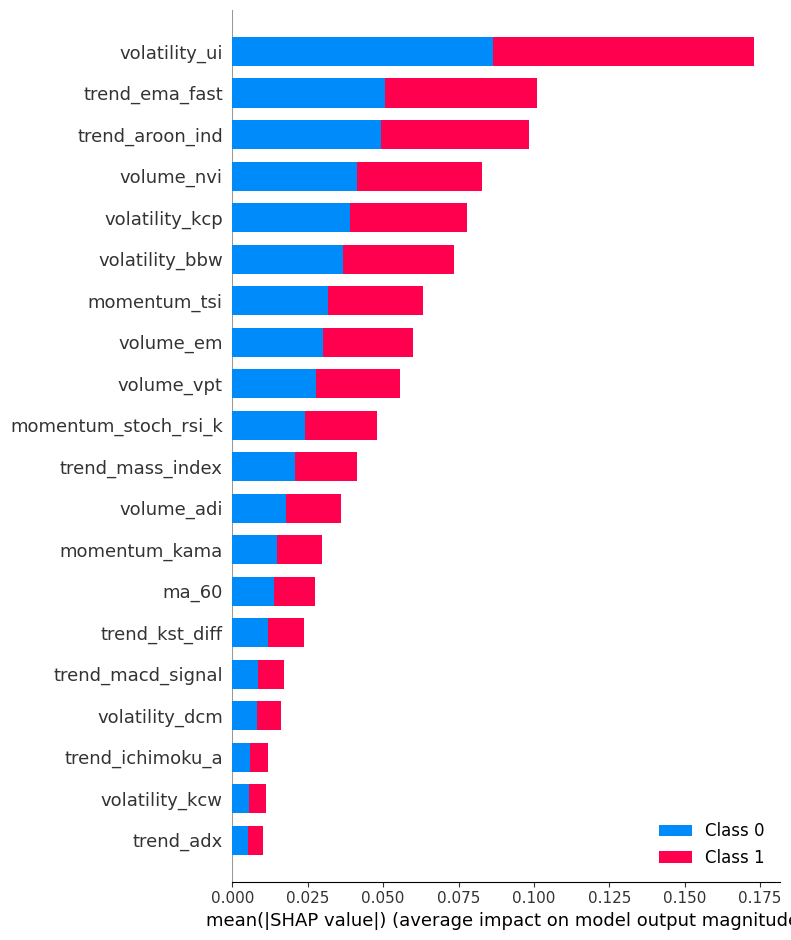

In [ ]:
#shap_value를 이용해 주요변수 추출

import lightgbm as lgb
from math import sqrt
from sklearn.metrics import mean_squared_error
!pip install shap
import shap
import skimage

lgb_dtrain = lgb.Dataset(data = X_train, label = y_train.replace({'Rising': 1, 'Falling': 0}))
print(lgb_dtrain)

lgb_param ={'max_depth': 1,
            'learning_rate': 0.01,
            'n_estimators': 1000,
            'objective': 'binary'}
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain)
lgb_model_predict = lgb_model.predict(X_test)

explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test)

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0])

shap.summary_plot(shap_values,X_test)

In [ ]:
#추출된 주요변수로 데이터 재구성
colunms = ['volatility_ui','trend_ema_fast', 'trend_aroon_ind','volume_nvi','volatility_kcp', 'volatility_bbw','momentum_tsi','volume_em', 'volume_vpt',
           'momentum_stoch_rsi_k', 'trend_mass_index','volume_adi','momentum_kama','ma_60','trend_kst_diff','trend_macd_signal','volatility_dcm','trend_ichimoku_a', 'volatility_kcw','trend_adx','label']

samsung_stock = samsung_stock[colunms]
samsung_stock

,volatility_ui,trend_ema_fast,trend_aroon_ind,volume_nvi,volatility_kcp,volatility_bbw,momentum_tsi,volume_em,volume_vpt,momentum_stoch_rsi_k,...,volume_adi,momentum_kama,ma_60,trend_kst_diff,trend_macd_signal,volatility_dcm,trend_ichimoku_a,volatility_kcw,trend_adx,label
Date,,,,,,,,,,,,,,,,,,,,,
2000-10-31,0.000000,2850.000000,0.0,1000.000000,0.666667,0.000000,0.000000,0.000000e+00,-1.127725e+06,0.000000,...,1.263847e+06,2850.000000,4620.833333,0.000000,0.000000,2740.0,2740.0,15.846339,0.000000,Rising
2000-11-01,0.000000,2913.076923,4.0,1000.000000,1.047170,26.841244,100.000000,6.172676e+06,-8.588441e+05,0.000000,...,3.025644e+06,3032.222222,4574.000000,3.815246,6.541311,2950.0,2950.0,17.845118,0.000000,Rising
2000-11-02,0.000000,2975.680473,8.0,1000.000000,0.952260,26.578070,100.000000,1.939633e+06,3.162739e+05,0.000000,...,3.415640e+06,3160.123457,4528.833333,4.735455,17.782037,3029.5,3029.5,17.066224,0.000000,Falling
2000-11-03,0.000000,3047.114247,12.0,1036.144578,1.111361,27.580792,100.000000,7.491754e+05,1.034792e+05,0.000000,...,4.059014e+06,3284.513032,4487.500000,5.622060,33.253011,3050.0,3050.0,14.029827,0.000000,Falling
2000-11-06,0.000000,3118.327440,16.0,1057.228916,1.075488,28.126526,100.000000,2.118511e+06,8.738420e+04,0.000000,...,3.910325e+06,3384.729462,4453.000000,6.239634,51.605426,3150.0,3150.0,14.561848,0.000000,Falling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09,3.837304,60307.969411,-72.0,5522.986974,0.505797,7.185818,1.222976,1.296342e+07,2.795853e+05,0.177905,...,-1.107691e+09,66381.462879,58296.666667,-25.936937,391.549494,60850.0,60825.0,3.808788,12.801241,Falling
2022-12-12,3.939733,60183.666424,-72.0,5440.690811,0.133041,7.353174,-0.019767,-1.659940e+06,7.878907e+04,0.245395,...,-1.113716e+09,66352.819953,58355.000000,-24.337778,310.051268,60850.0,60850.0,3.778797,11.974065,Falling
2022-12-13,4.050021,60109.256205,-72.0,5440.690811,0.246377,7.157801,-0.735364,1.493219e+06,-1.042599e+05,0.301400,...,-1.116729e+09,66325.128715,58413.333333,-22.518223,237.372245,60850.0,60850.0,3.815317,11.440981,Falling


In [ ]:
samsung_stock_data = samsung_stock.drop(['label'], axis = 1)
samsung_stock_target = samsung_stock['label']

# 재구성된 데이터를 train data와 test data로 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(samsung_stock_data, samsung_stock_target, random_state=0)
print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)


X_train 크기: (4100, 20)
y_train 크기: (4100,)
X_test 크기: (1367, 20)
y_test 크기: (1367,)


데이터 전처리 방법에는 여러가지가 있으나, 본 연구에서는 MinMaxScaler, QuantileTransformer, StandardScaler의 총 세가지의 전처리 기법을 이용함. 이 중 각 모델별로 정확도가 가장 높게 나오는 전처리 방법을 선택해 사용함

In [ ]:
# 데이터 전처리(MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train_MinMaxScaler = scaler.transform(X_train)
X_test_MinMaxScaler = scaler.transform(X_test)

In [ ]:
# 데이터 전처리(QuantileTransformer)
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer()

X_train_QuantileTransformer = scaler.fit_transform(X_train)
X_test_QuantileTransformer = scaler.fit_transform(X_test)

In [ ]:
# 데이터 전처리(StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_StandardScaler = scaler.fit_transform(X_train)
X_test_StandardScaler = scaler.fit_transform(X_test)

**여기서부터 알고리즘 별 훈련/테스트 시작**

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, random_state = 2)
rfc_model = rfc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(rfc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rfc.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.867


In [ ]:
rfc_pred = rfc_model.predict(X_test)
rfc_pred_df = pd.DataFrame(rfc_pred, columns=['rfc_prediction'])
rfc_pred_df

,rfc_prediction
0,Rising
1,Falling
2,Falling
3,Rising
4,Falling
...,...
1362,Falling
1363,Rising
1364,Rising
1365,Rising


In [ ]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

gb_clf = GradientBoostingClassifier(random_state=0)

gb_model = gb_clf.fit(X_train_MinMaxScaler, y_train)

print("훈련 세트 정확도: {:.3f}".format(gb_clf.score(X_train_MinMaxScaler, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gb_clf.score(X_test_MinMaxScaler, y_test)))

훈련 세트 정확도: 0.811
테스트 세트 정확도: 0.723


In [ ]:
gb_pred = gb_model.predict(X_test)
gb_pred_df = pd.DataFrame(gb_pred, columns=['gb_prediction'])
gb_pred_df

X has feature names, but GradientBoostingClassifier was fitted without feature names


,gb_prediction
0,Falling
1,Falling
2,Falling
3,Falling
4,Falling
...,...
1362,Rising
1363,Falling
1364,Falling
1365,Falling


In [ ]:
#SVC모델

from sklearn.svm import SVC

svc = SVC(C=100)#규제 매개변수 C값 조절
svc_model = svc.fit(X_train_QuantileTransformer, y_train)
print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_QuantileTransformer, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_QuantileTransformer, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.798


In [ ]:
svc_pred = svc_model.predict(X_test_QuantileTransformer)
svc_pred_df = pd.DataFrame(svc_pred, columns=['svc_prediction'])
svc_pred_df

,svc_prediction
0,Rising
1,Falling
2,Falling
3,Rising
4,Rising
...,...
1362,Falling
1363,Rising
1364,Rising
1365,Falling


In [ ]:
#GaussianNB

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X_train_MinMaxScaler, y_train)
print("훈련 세트 정확도: {:.3f}".format(nb.score(X_train_MinMaxScaler, y_train)))
print("테스트 세트 정확도: {:.3f}".format(nb.score(X_test_MinMaxScaler, y_test)))

훈련 세트 정확도: 0.539
테스트 세트 정확도: 0.541


In [ ]:
nb_pred = nb.predict(X_test_MinMaxScaler)
nb_pred_df = pd.DataFrame(nb_pred, columns=['nb_prediction'])
nb_pred_df

,nb_prediction
0,Rising
1,Rising
2,Rising
3,Falling
4,Rising
...,...
1362,Falling
1363,Falling
1364,Rising
1365,Falling


In [ ]:
#MLPClassifier(런타임 오래걸림 주의)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', random_state=42, hidden_layer_sizes=[500, 500]).fit(X_train_StandardScaler, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_StandardScaler, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_StandardScaler, y_test)))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


훈련 세트 정확도: 0.992
테스트 세트 정확도: 0.793


In [ ]:
mlp_pred = mlp.predict(X_test_StandardScaler)
mlp_pred_df = pd.DataFrame(mlp_pred, columns=['mlp_prediction'])
mlp_pred_df

,mlp_prediction
0,Rising
1,Falling
2,Falling
3,Rising
4,Falling
...,...
1362,Falling
1363,Rising
1364,Rising
1365,Rising


각 모델 예측값 합치기

In [ ]:
samsung_stock = samsung_stock.reset_index()

In [ ]:
date = samsung_stock['Date']
date = date.iloc[-1367:]
date

4100   2017-05-29
4101   2017-05-30
4102   2017-05-31
4103   2017-06-01
4104   2017-06-02
          ...    
5462   2022-12-09
5463   2022-12-12
5464   2022-12-13
5465   2022-12-14
5466   2022-12-15
Name: Date, Length: 1367, dtype: datetime64[ns]

In [ ]:
date_df = date.reset_index(drop = 'True')
samsung_stock_pred = pd.concat([date_df, rfc_pred_df, svc_pred_df, gb_pred_df,mlp_pred_df],axis=1) ##GaussianNB는 테스트세트 예측 정확도가 0.541로 낮게 나와서 뺌
samsung_stock_pred 

,Date,rfc_prediction,svc_prediction,gb_prediction,mlp_prediction
0,2017-05-29,Rising,Rising,Falling,Rising
1,2017-05-30,Falling,Falling,Falling,Falling
2,2017-05-31,Falling,Falling,Falling,Falling
3,2017-06-01,Rising,Rising,Falling,Rising
4,2017-06-02,Falling,Rising,Falling,Falling
...,...,...,...,...,...
1362,2022-12-09,Falling,Falling,Rising,Falling
1363,2022-12-12,Rising,Rising,Falling,Rising
1364,2022-12-13,Rising,Rising,Falling,Rising
1365,2022-12-14,Rising,Falling,Falling,Rising


In [ ]:
#상승예측을 1, 하락예측을 -1로 치환해 4개 모델의 합계를 구함 ex) prediction이 2.0이면 세개의 모델이 상승예측, 하나의 모델이 하락예측을 한 것
count1 = samsung_stock_pred.replace({'Rising':1.0,'Falling':-1.0})
samsung_stock_pred['prediction'] = count1.sum(axis = 1,numeric_only=True)

samsung_stock_pred

,Date,rfc_prediction,svc_prediction,gb_prediction,mlp_prediction,prediction
0,2017-05-29,Rising,Rising,Falling,Rising,2.0
1,2017-05-30,Falling,Falling,Falling,Falling,-4.0
2,2017-05-31,Falling,Falling,Falling,Falling,-4.0
3,2017-06-01,Rising,Rising,Falling,Rising,2.0
4,2017-06-02,Falling,Rising,Falling,Falling,-2.0
...,...,...,...,...,...,...
1362,2022-12-09,Falling,Falling,Rising,Falling,-2.0
1363,2022-12-12,Rising,Rising,Falling,Rising,2.0
1364,2022-12-13,Rising,Rising,Falling,Rising,2.0
1365,2022-12-14,Rising,Falling,Falling,Rising,0.0


In [ ]:
#백테스팅을 위한 삼성전자 주가데이터 다시 불러오기
start_date = '2017-05-29'
end_date = '2022-12-15'

samsung_stock = fdr.DataReader('005930', start_date, end_date)

samsung_stock = samsung_stock.reset_index(drop = False)

samsung_stock["Change"] = samsung_stock["Close"] - samsung_stock["Close"].shift(1)

samsung_stock

,Date,Open,High,Low,Close,Volume,Change
0,2017-05-29,46220,46400,45380,45620,174791,NaN
1,2017-05-30,45520,45660,44480,44640,248672,-980.0
2,2017-05-31,44580,45020,44400,44700,373382,60.0
3,2017-06-01,44860,44900,44400,44680,195070,-20.0
4,2017-06-02,45060,45960,45000,45960,249775,1280.0
...,...,...,...,...,...,...,...
1362,2022-12-09,59300,60600,59300,60400,10529632,1200.0
1363,2022-12-12,59900,60000,59400,59500,9036472,-900.0
1364,2022-12-13,59600,60300,59400,59700,9040873,200.0
1365,2022-12-14,59800,60600,59800,60500,8207485,800.0


In [ ]:
#여기서부턴 백테스팅 코드
price_data = samsung_stock["Close"]
Firms=["samsung"]
StockP = samsung_stock
Days= samsung_stock['Date'].tolist()
pred = samsung_stock_pred['prediction']

In [ ]:
possesion_period = 20
fee = 0

class trade:

    def __init__(self, start_date, start_price, start_investment):
        self.purchase_time = start_date
        self.purchase_price = start_price
        self.investment = start_investment
        self.trade_revenue = None
        self.sale_price = 0
        self.sale_day = 0
        self.stock_count=0
        self.dif=0

class trade_management:
    
    def __init__(self, investment):
        
        self.current_trade = []
        self.end_trade = []
        
        self.investment = investment
        
        self.current_money=0
        self.total_money = 0

        self.total_money_curve=[]
        self.remaining_money_curve=[]

    def create_trade(self, today):  
      if pred[today] > 0: #3개 이상의 모델이 상승예측을 했을때
            new_trade = trade(today, price_data[today], self.investment) #매수 실시
            self.current_money -= price_data[today]+fee
            self.current_trade.append(new_trade)
            
    def sell_by_dates(self, today):

        del_date = []

        for i in range(len(self.current_trade)):
            if (self.current_trade[i].purchase_time) + possesion_period <= today: #매수일로부터 20일이 지나면 매도
                del_date.append(i)

               
                self.current_trade[i].sale_price = price_data[today]
                self.current_trade[i].sale_day = today
                
                # 구매 주식 수량
                N = 1
                
                #self.current_trade[i].investment / self.current_trade[i].purchase_price
                self.current_trade[i].stock_count = 1
                
                # 1개 주식 이득 (sale price - purchase price)
                dif = self.current_trade[i].sale_price - self.current_trade[i].purchase_price
                self.current_trade[i].dif = dif
                
                # 매도 시 이익
                Rev = N * dif
                
                # 매도 종료 시 돈을 얻는다. (purchase_price - current_price) / purchase_price * investment
                self.current_money += Rev
                                
                # trade로 인한 Revenue를 기록한다.
                self.current_trade[i].trade_revenue = Rev
                
        for i in sorted(del_date, reverse = True):
            self.end_trade.append(self.current_trade.pop(i))
                

    

    def calculate_total_money_of_day(self, today):
        self.total_money = self.current_money
    
        for trade in self.current_trade:
            if trade.sale_price != 0:
          
              revenue = Rev
              self.total_money += revenue 
        
       
            self.total_money += trade.investment
    
        self.total_money_curve.append(self.total_money)

    def daily_sale(self, today):
        # self.create_trade(today, self.current_money*investment_ratio) 얘는 매 회사마다 반복되야 하기에 따로 빼놨음.
        #self.sell_by_money(today)
        self.sell_by_dates(today)
        self.calculate_total_money_of_day(today)
        self.remaining_money_curve.append(self.current_money)

In [ ]:
TM = trade_management(100)

for i in range(len(Days)):
  TM.create_trade(i) # 매 회사마다 어제자 데이터와 수치를 비교 후 create_trade 실행.
  TM.daily_sale(i)

In [ ]:
#트레이딩 기록
purchase_time = [TM.end_trade[i].purchase_time for i in range(len(TM.end_trade))]
sale_days = [TM.end_trade[i].sale_day for i in range(len(TM.end_trade))]
purchase_price = [TM.end_trade[i].purchase_price for i in range(len(TM.end_trade))]
trade_revenue = [TM.end_trade[i].trade_revenue for i in range(len(TM.end_trade))]
sale_price = [TM.end_trade[i].sale_price for i in range(len(TM.end_trade))]
stock_number = [TM.end_trade[i].stock_count for i in range(len(TM.end_trade))]
Rev_pstock = [TM.end_trade[i].dif for i in range(len(TM.end_trade))]

df = pd.DataFrame([purchase_time,sale_days, purchase_price, sale_price,Rev_pstock, stock_number, trade_revenue]).T
df.columns = ["Trading Days", "sale Days","purchase price", "sale_price","Rev_pstock","stock_number","Trading Revenue"]
df=df.sort_values("sale Days")
df

,Trading Days,sale Days,purchase price,sale_price,Rev_pstock,stock_number,Trading Revenue
0,0,20,45620,48300,2680,1,2680
1,3,23,44680,47540,2860,1,2860
2,5,25,45940,47000,1060,1,1060
3,7,27,45160,48060,2900,1,2900
4,8,28,46100,47860,1760,1,1760
...,...,...,...,...,...,...,...
607,1338,1358,60200,60300,100,1,100
608,1340,1360,62000,58900,-3100,1,-3100
609,1342,1362,62900,60400,-2500,1,-2500
610,1343,1363,61900,59500,-2400,1,-2400


In [ ]:
df["Trading Revenue_add"] = df["Trading Revenue"].fillna(0).cumsum()
Revenue_add = df["Trading Revenue_add"]

In [ ]:
#예측모델을 사용했을 때 수익 합계
Revenue = df["Trading Revenue"].sum()
Revenue

93240

In [ ]:
#예측모델 시작일(2017-05-29)부터 종료일(2022-12-15)까지 주식 한주를 보유했을때 수익 합계
Revenue1 = samsung_stock["Change"].sum()
Revenue1

13680.0

In [ ]:
df2 = df.set_index("sale Days")

In [ ]:
df3 = pd.merge(samsung_stock, df2, left_index=True, right_index=True, how='outer')
df3

,Date,Open,High,Low,Close,Volume,Change,Trading Days,purchase price,sale_price,Rev_pstock,stock_number,Trading Revenue,Trading Revenue_add
0,2017-05-29,46220,46400,45380,45620,174791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-05-30,45520,45660,44480,44640,248672,-980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-05-31,44580,45020,44400,44700,373382,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-06-01,44860,44900,44400,44680,195070,-20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-06-02,45060,45960,45000,45960,249775,1280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,2022-12-09,59300,60600,59300,60400,10529632,1200.0,1342.0,62900.0,60400.0,-2500.0,1.0,-2500.0,98340.0
1363,2022-12-12,59900,60000,59400,59500,9036472,-900.0,1343.0,61900.0,59500.0,-2400.0,1.0,-2400.0,95940.0
1364,2022-12-13,59600,60300,59400,59700,9040873,200.0,1344.0,62400.0,59700.0,-2700.0,1.0,-2700.0,93240.0
1365,2022-12-14,59800,60600,59800,60500,8207485,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


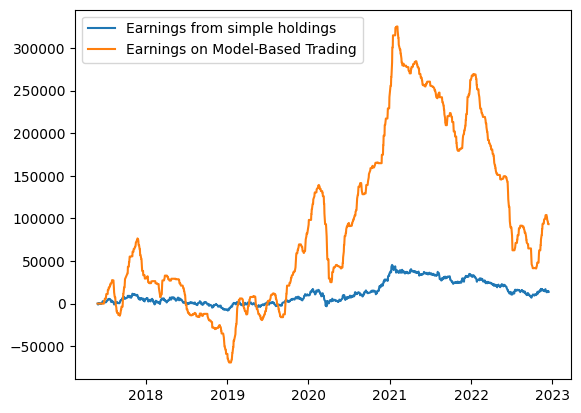

In [ ]:
#그래프로 시각화
plt.plot(df3["Date"], df3["Change"].fillna(0).cumsum(), label="Earnings from simple holdings") 
plt.plot(df3["Date"], df3["Trading Revenue"].fillna(0).cumsum(), label="Earnings on Model-Based Trading") 
plt.legend()